In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, 0]
y = dataset.iloc[:, 1]

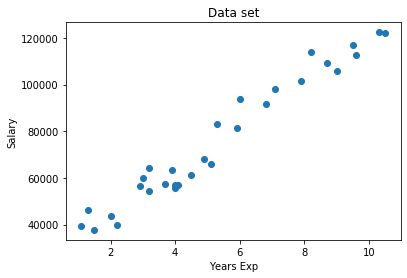

In [3]:
plt.scatter(X, y)
plt.xlabel('Years Exp')
plt.ylabel('Salary')
plt.title('Data set')
plt.show()

In [4]:
# Hyperparameters
learning_rate = 0.01
initial_b = 0   #initial_bias
initial_m = 0   # initial_weight
num_iterations = 50

In [5]:
# compute cost 
def compute_cost(b, m, dataset):
    total_cost = 0.0 # sum of all Mean Square Error
    N = float(len(dataset))
    
    for i in range(0, len(dataset)):
        x = dataset.iloc[i, 0]
        y = dataset.iloc[i, 1]
        total_cost += (y - (m * x + b)) ** 2
    
    # return average of mse
    return total_cost/N

In [6]:
# Gradient Descent
def gradient_descent(dataset, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []
    
    # For everry iterations, optimize b,m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, dataset))
        b, m = step_gradient(b, m, dataset, learning_rate)
    return [b, m, cost_graph]

def step_gradient(b_current, m_current, dataset, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(dataset))

    #Calculate Gradient
    for i in range(0, len(dataset)):
        x = dataset.iloc[i, 0]
        y = dataset.iloc[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current weight and bias
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated                            

In [11]:
b, m, cost_graph = gradient_descent(dataset, initial_b, initial_m, learning_rate, num_iterations)
print(cost_graph)
# print optimized parameters
print('Optimized bias: ', b)
print('Optimized weight: ', m)

# mse with optimized parameters
print('Minimized mse: ', compute_cost(b, m, dataset))

[6502955270.733334, 595473385.3584363, 183107992.77965578, 153439943.15246925, 150431609.68263757, 149287859.1946675, 148281849.30853176, 147293253.18832058, 146313625.0332805, 145342311.18563536, 144379201.19852158, 143424223.0033718, 142477307.74788544, 141538387.34269568, 140607394.28596509, 139684261.64665824, 138768923.05890283, 137861312.71716088, 136961365.3714941, 136069016.32287237, 135184201.41852227, 134306857.0473157, 133436920.13519569, 132574328.1406429, 131719019.05017868, 130870931.37390701, 130030004.14109418, 129196176.89578494, 128369389.69245659, 127549583.09170917, 126736698.15599245, 125930676.44536848, 125131460.01331057, 124338991.40253718, 123553213.64088123, 122774070.23719427, 122001505.17728527, 121235462.91989368, 120475888.39269611, 119722726.9883476, 118975924.5605556, 118235427.42018686, 117501182.33140819, 116773136.50785896, 116051237.60885644, 115335433.73563224, 114625673.42760211, 113921905.6586657, 113224079.83353831, 112532145.78411372]
Optimized 

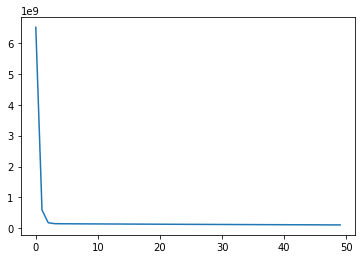

In [8]:
plt.plot(cost_graph)
plt.show()

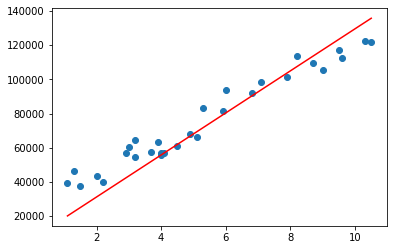

In [9]:
plt.scatter(X, y)
pred = m * X + b
plt.plot(X, pred, c = 'r')
plt.show()